# 3.1 ndarray与Python原生list运算效率对比

In [6]:
import numpy as np 
import random 
import time

py_lst = []
for i in range(100_000_000):
    py_lst.append(random.random())

In [9]:
ndarray_lst = [random.random() for _ in range(100_000_000)]


In [10]:
t1 = time.time()
a = sum(py_lst)
t2 = time.time()
rs1 = t2-t1
print(f"sum py_lst time: {rs1}")

t3 = time.time()
a = sum(ndarray_lst)
t4 = time.time()
rs2 = t4-t3
print(f"sum ndarray_lst time: {rs2}")

sum py_lst time: 5.36789083480835
sum ndarray_lst time: 1.2718284130096436


### 1. 存储风格 
从图中我们可以看出ndarray:在存储数据的时候,数据与数据的地址都是连续的,这样就给使得批量操作数组元素时速度更快.
这是因为ndarray中的所有元素的类型都是相同的,而Python列表中的元素类型是任意的,所以ndarray在存储元素时内存可以连续,而oython.原生list就只能通过寻址方式找到下一个元素,这虽然也导致了在通用性能方面Numpy的ndarray不及Python原生Iist,但在科学计算中,Numpy 的ndarray就可以省掉很多循环语句,代码使用方面比Python原生Iist简单的多.

### 2 ndarray支持并行化运算(向量化运算)
### 3 Nupy底层使用C语言编写,内部解除了GL(全局解释器锁),其对数组的操作速度不受Python解释器的限制,效率远高于纯Python代码.


# 3.2 ndarray 属性

 属性名字                  属性解释
ndarray.shape           数组维度的元组
ndarray.ndim            数组维数(中括号个数)
ndarray.size            数组中的元素数量
ndarray.itemsize        一个数组元素的长度(字节)
ndarray.dtype           数组元素的类型(默认数据类型:int64,8字节)


# 3.3 基本操作

1.ndarray.方法()
2.np.函数名()

3.3.1 生成数组的方法
 1. 生成0,1 
    np.zeros(), np.ones()
 2. 从现有数组中生成
    np.array(), np.copy():深拷贝
    np.asarray()         :浅拷贝
 3. 生成固定范围的数组
    np.linspace(0,10,100) : [0,10] 100个等距离的数组
    np.arrange(a,b,c)     : [a,b) 步长为c的数组
 4. 生成随机数组
    分布状况-直方图
      1)均匀分布
      2)正态分布

In [13]:
import numpy as np 

#  1. 生成0,1数组
np.zeros(shape=(3,4),dtype='float32') 
np.ones(shape=(3,4),dtype='int32') 

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

In [87]:
#  2. 从现有数组中生成
import numpy as np 
py_lst = np.array([[11,22,14],[15,36,21],[52,63,65],[41,78,95],[68,41,25]])

data1 = np.array(py_lst)
data2 = np.asarray(py_lst)
data3 = np.copy(py_lst)
# print(data1)
# print(data2)
# print(data3)
print("*"*20)
py_lst[1,1] = 10000
print(data1)
print(data2)
print(data3)


********************
[[11 22 14]
 [15 36 21]
 [52 63 65]
 [41 78 95]
 [68 41 25]]
[[   11    22    14]
 [   15 10000    21]
 [   52    63    65]
 [   41    78    95]
 [   68    41    25]]
[[11 22 14]
 [15 36 21]
 [52 63 65]
 [41 78 95]
 [68 41 25]]


In [39]:
# 3. 生成固定范围的数组
import numpy as np 
np.linspace(0,10,5) # 0-10 等间距的5个数

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [42]:
import numpy as np 

np.arange(0,10,5) #0-10,步长5

array([0, 5])

In [44]:
import numpy as np 
#  4. 生成随机数组 - 均匀分布
# 均匀分布(Uniform Distribution)是概率统计中的重要分布之一.顾名思义,均匀,表示可能性相等的含义.均匀分布在自然情况下极为罕见,而人工栽培的有一定株行距的植物群落即是均匀分布.

data1 = np.random.uniform(low=-1,high=1,size=100000) #low:采样下届,默认0; high:采样上届(不包含high),默认1; size:数据个数

data1


array([ 0.69428817, -0.043555  ,  0.74396457, ..., -0.44718174,
        0.72248654,  0.97278606])

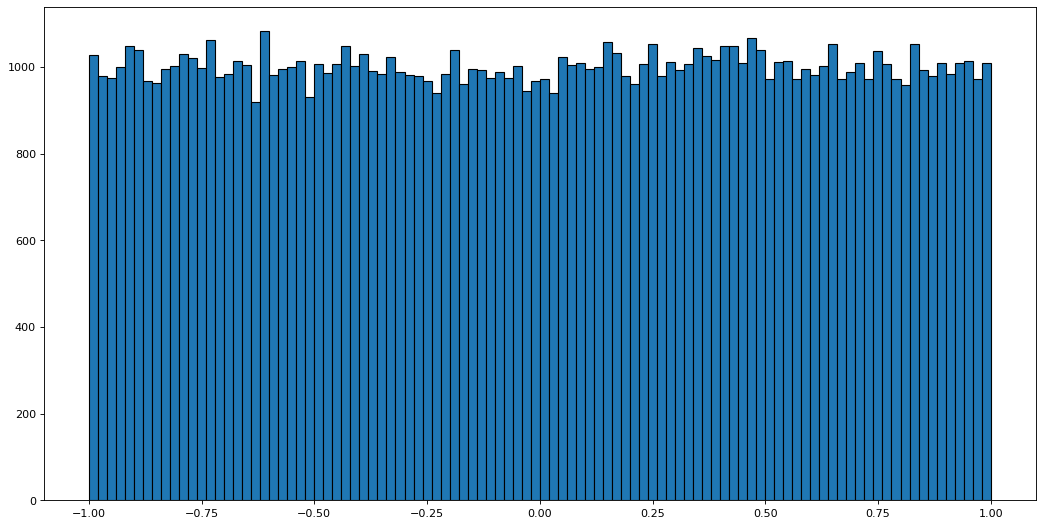

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=80)
plt.hist(data1,bins=100,edgecolor='k')
plt.show()


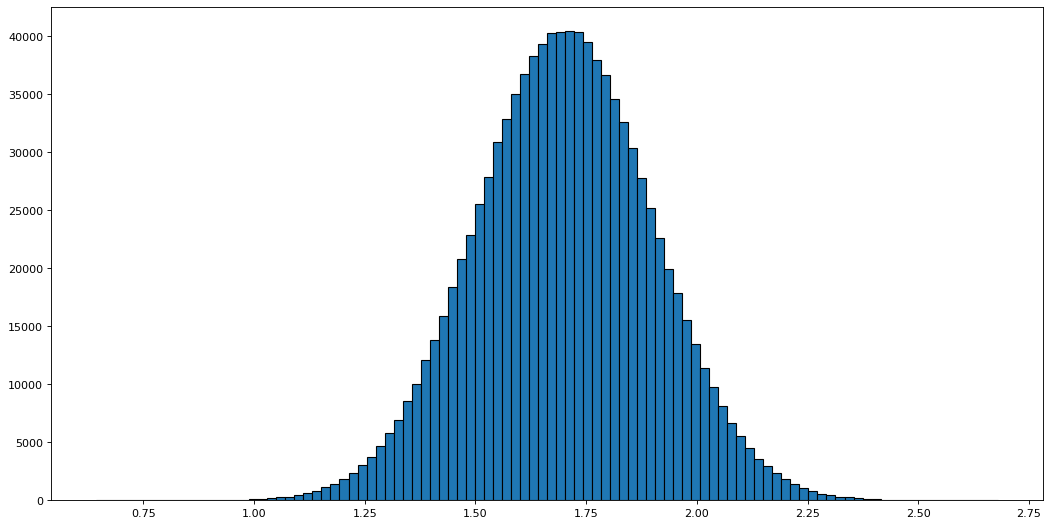

In [54]:
#  4. 生成随机数组 - 正态分布
import numpy as np 
import matplotlib.pyplot as plt

data2 = np.random.normal(loc=1.7,scale=0.2,size=1000000) #loc:分布均值, scale:标准差, size:数据个数

plt.figure(figsize=(16,8), dpi=80)
plt.hist(data2,bins=100,edgecolor='k')
plt.show()

## 3.3.2 数组切片,索引

### 案例:随机生成8只股票2周的交易日涨幅数据

In [56]:
import numpy as np 
stock_change = np.random.normal(loc=0,scale=1,size=(8,10)) # 正态分布数据
stock_change

array([[ 0.91134166, -0.37863247,  1.49092712,  0.32986169,  1.59431139,
         1.95948319,  1.24515729,  0.63676055, -0.14705045,  0.28234381],
       [-0.78551231, -0.85185521,  1.33913248, -0.17825808,  1.05889563,
        -1.79140075,  0.89112605,  0.36855083,  0.70827295, -0.26053645],
       [ 0.05832808,  0.14637877, -0.82549432, -0.32367712, -0.47765344,
         1.01265083,  0.17918711,  0.29825793,  1.87682091, -1.35973472],
       [ 0.24331846,  1.61289889,  0.64134844,  0.46340687, -0.84284705,
         0.83382718,  0.25640401, -1.88333219,  0.53353051,  0.45326134],
       [-1.68703446,  1.26933937,  0.75069424, -0.76042647, -0.11379183,
        -0.88055099, -0.17407138,  0.28815119, -0.19298881, -0.03098199],
       [-0.51814172, -1.04060027, -0.55706603, -0.95744659,  0.57219046,
         1.13376028, -0.16513316,  0.60077383, -0.49972253,  0.22526794],
       [ 0.42943622, -0.03113752,  0.87193107,  0.4021548 ,  1.31163671,
        -1.32014718, -0.41960325,  1.08817863

In [58]:
import numpy as np 
import matplotlib.pyplot as plt
#获取第一个股票的前3个交易日的涨跌幅数据
stock_change[0,0:3]

array([ 0.91134166, -0.37863247,  1.49092712])

In [63]:
a1 = np.array([[[1,2,3],[4,5,6]],[[12,3,4],[5,6,7]]])
a1.shape
a1[1,0,2]=10000000000
a1


array([[[          1,           2,           3],
        [          4,           5,           6]],

       [[         12,           3, 10000000000],
        [          5,           6,           7]]])

## 3.3.3 形状修改
  1. ndarray.reshape()
  2. ndarray.resize()
  3. ndarray.T

In [74]:
# 1. ndarray.reshape()
stock_change
stock_change.reshape((10,8))  # 只修改形状
# 2. ndarray.resize()
stock_change.resize((10,8)) # 无返回值, 原始数据不变
stock_change.shape
stock_change
# 3. ndarray.T # 转置
stock_change.T.shape


(8, 10)

## 3.3.4 类型修改
    1. ndarray.astype(type)
    2. ndarray.tobytes() ndarray 序列化到本地 


In [75]:
import numpy as np 
stock_change.astype("int32")


array([[ 0,  0,  1,  0,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, -1,  0,  1],
       [ 0,  0,  0,  0,  0, -1,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  0,  1,  0, -1,  0,  0],
       [-1, -1,  1,  0,  0, -1,  0,  0]], dtype=int32)

In [78]:
import numpy as np 
stock_change.tobytes()

b'\x93\xec#\xfc\xb5)\xed?\xf3\xf1\x9f\xaf\x83;\xd8\xbf}.\x8be\xd6\xda\xf7?\x0b\xdb\x993t\x1c\xd5?\x19\xe0\x08\xa8L\x82\xf9?\x01\xb7\'\x0b\x0bZ\xff?fkA\r*\xec\xf3?\n\xfe\xb6\xa6W`\xe4?X:\xe5\x9b\x8c\xd2\xc2\xbfN\x98\x8b\xc6\xeb\x11\xd2? \xc2B\xb6\xea"\xe9\xbff\x86\'\xdceB\xeb\xbf#@v-\x16m\xf5?QR\x9d1)\xd1\xc6\xbf\x14\xfb\xf1\x8a<\xf1\xf0?\x14\xfb\xa9\xd4\x93\xa9\xfc\xbf\x17\xf3\xf5\xc8\x1a\x84\xec?!/\xcd<V\x96\xd7?\x14\xcb\xe0\x07,\xaa\xe6?\xdd|\x95\x11\xa1\xac\xd0\xbf|5n\xb6-\xdd\xad?L,U"\x8a\xbc\xc2?\x93\x0c\xe3\x12sj\xea\xbf^o\xae: \xb7\xd4\xbf\x8b\t\xac\xb7\xdf\x91\xde\xbf\xd0\x1b\xdeZ\xd13\xf0?\xd2\x846f\x9a\xef\xc6?\xcbC\x19m\xa8\x16\xd3?\x89t\x9f]u\x07\xfe? \x15Z1y\xc1\xf5\xbfT\xda\t&\x0f%\xcf?\xe9h\x05\x12o\xce\xf9?=\xa1N+\xed\x85\xe4?\x1f)\xd2Iu\xa8\xdd?\xfcR\x8f_\x9a\xf8\xea\xbf\x13b\x1bT\xb6\xae\xea?\x0bh\x13Y\xech\xd0?C\xb8x\xef "\xfe\xbf\xfc\xe3\xd7\x95\xae\x12\xe1?\xfaD3\xde;\x02\xdd?\xf3\x89\x91\xd7\x17\xfe\xfa\xbf\xf0g\xc0\xcb6O\xf4?\x8a\x92\xb3\xed\xaf\x05\xe8?~\xeb\x1c

## 3.3.5 数组去重
 1. ndarray.unique()
 2. 打平后用set()

In [81]:
data = np.array([[1,2,3,5],[4,1,2,3],[6,2,1,2],[1,2,1,2]])
data

array([[1, 2, 3, 5],
       [4, 1, 2, 3],
       [6, 2, 1, 2],
       [1, 2, 1, 2]])

In [82]:
np.unique(data)

array([1, 2, 3, 4, 5, 6])

In [84]:
data.flatten()
set(data.flatten())

{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)}

# 3.4 ndarray运算

In [89]:
# 1.逻辑运算
import numpy as np 
stock_change = np.random.normal(loc=0,scale=1,size=(8,10)) # 正态分布数据
stock_change
# 逻辑判断,如果涨跌幅大于0.5就标记为True否则为Fa1se
stock_change > 0.5

array([[ True, False, False, False, False,  True, False, False, False,
         True],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False,  True, False, False,  True, False, False, False, False,
        False],
       [ True,  True, False,  True,  True,  True,  True,  True, False,
         True],
       [False,  True, False, False, False, False, False, False,  True,
        False],
       [False,  True,  True,  True, False, False, False,  True,  True,
        False],
       [False, False,  True, False, False, False,  True, False, False,
        False],
       [False,  True,  True, False,  True, False,  True,  True, False,
         True]])

In [92]:
# 1.1 布尔索引
stock_change[stock_change > 0.5] = 1 # 涨跌幅大于0.5赋值为1
stock_change

array([[ 1.        ,  0.00789169, -0.32178486, -0.11000272,  0.11394827,
         1.        , -0.56131376,  0.00647415,  0.06829077,  1.        ],
       [-0.35566946, -1.74195325, -0.59631423, -1.11274592, -0.43607968,
        -1.18752365,  0.35403983,  1.        , -1.26248634, -0.76775317],
       [ 0.14428308,  1.        , -1.23348143, -0.0724571 ,  1.        ,
        -0.78487708, -0.37508903,  0.19449221, -0.75789717, -1.60757141],
       [ 1.        ,  1.        , -0.4790859 ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        , -0.3183176 ,  1.        ],
       [-0.75144833,  1.        ,  0.30809737, -0.81125113, -1.83679658,
        -0.40770952,  0.15905264, -0.36233278,  1.        ,  0.46262207],
       [-0.19022304,  1.        ,  1.        ,  1.        ,  0.49049983,
         0.14323489, -3.37762665,  1.        ,  1.        ,  0.45581489],
       [-1.48082592,  0.23496262,  1.        ,  0.41727927,  0.3305497 ,
        -0.63371356,  1.        , -1.60293323

In [96]:
# 1.2 通用判断函数
# 1.2.1 np.all(布尔值) 传入的布尔值全部为true时,才为true, 类似 与逻辑
# 判断stock_change[0:2,0:5] 是否全部上涨
stock_change[0:2,0:5] > 0
np.all(stock_change[0:2,0:5]>0.5)


np.False_

In [100]:
# 1.2.2 np.any(布尔值) 传入的布尔值有一个为true时,就为true, 类似 或逻辑
# 判断前5只股票这段期间是否有上涨的
stock_change[0:5,:] > 0
np.any(stock_change[0:5,:]>0.5)

np.True_

In [ ]:
# 1.3 三元运算符
# 1.3.1 np.where()

In [ ]:
# 2.统计运算
# 3.数组间运算